In [1]:
import os
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

Using TensorFlow backend.


In [2]:
from SqueezeDetHelpers import get_all_points_from_prediction
from Models.PoolingAndFire import create_loss_function_multiple_detection
from PreProcess import get_anchors, load_data_with_anchors, get_left_hand, get_right_hand

In [3]:
MODEL_FILE = r"results/all_points_first_test.h5py"
ANNOTATIONS_PATH = os.path.expanduser("~/datasets/RHD/RHD_published_v2/training/annotations")
RHD_ANNOTATIONS_FILE = os.path.expanduser("~/datasets/RHD/RHD_published_v2/training/anno_training.pickle")
DATA_DIR = os.path.expanduser("~/datasets/RHD/RHD_published_v2/training/color")

In [4]:
BATCHSIZE = 64
EPSILON = 1e-16

LABEL_WEIGHT = 1.0
OFFSET_LOSS_WEIGHT = 1.0
OFFSET_WEIGHT = 40.0

NUM_CLASSES = 42

l = create_loss_function_multiple_detection(20,
                                            20,
                                            LABEL_WEIGHT,
                                            OFFSET_WEIGHT,
                                            OFFSET_LOSS_WEIGHT,
                                            NUM_CLASSES,
                                            EPSILON,
                                            BATCHSIZE)

In [5]:
model = load_model(MODEL_FILE, custom_objects={'loss_function': l})

In [6]:
SAMPLES_TO_CHECK = range(20)

In [7]:
labels, images = load_data_with_anchors(SAMPLES_TO_CHECK,
                                        DATA_DIR,
                                        ANNOTATIONS_PATH,
                                        320, 320,
                                        20, 20,
                                        'png',
                                        num_classes=NUM_CLASSES)

images_show = np.zeros(images.shape, dtype=np.uint8)
for c, im in enumerate(images):
    images_show[c] = cv2.cvtColor((im * 255.0).astype(np.uint8), cv2.COLOR_BGR2RGB)

print(np.max(images[0]))

0.9450980392156862


In [8]:
right_hand = []
left_hand = []

with open(RHD_ANNOTATIONS_FILE, 'rb') as f:
    annotations = pickle.load(f)
    
for s in SAMPLES_TO_CHECK:
    right_hand.append(get_right_hand(s, annotations))
    left_hand.append(get_left_hand(s, annotations))

In [9]:
for c, h in enumerate(right_hand):
    for finger, point in h.items():
        p = point[:2]
        if p[0] < 0 or p[1] < 0:
            continue
        cv2.circle(images_show[c], (p[0], p[1]), 1, (0, 255, 0), thickness=1)
    
for c, h in enumerate(left_hand):
    for finger, point in h.items():
        p = point[:2]
        if p[0] < 0 or p[1] < 0:
            continue
        cv2.circle(images_show[c], (p[0], p[1]), 1, (0, 255, 0), thickness=1)

In [11]:
res = []
for im in images:
    res.append(model.predict(im.reshape(1, 320, 320, 3)))

In [31]:
THRESHOLD = 0.9

for c, r in enumerate(res):
    #print(r.shape)
    #pred = r.reshape(20, 20, 3)
    
    for i in range(NUM_CLASSES):
        pred = np.zeros((20, 20, 3))
        
        pred[:, :, 0] = res[c][:, :, :, i]
        pred[:, :, 1:] = res[c][:, :, :, NUM_CLASSES+i:NUM_CLASSES+i+1]
        
        print(np.mean(pred[:, :, 0]))
        
        continue
        anchors = get_anchors(320, 320, 20, 20)
        max_val = np.max(pred[:,:,0])
        pred_point = get_all_points_from_prediction(pred,
                                                    anchors,
                                                    threshold=max_val*0.9,
                                                    do_scale=True,
                                                    offset_weight=OFFSET_WEIGHT)
        for p in pred_point:
            x = p[0] + p[2]
            y = p[1] + p[3]
            
            print(f"Predicted point: ({x}, {y})")

            cv2.circle(images_show[c], (int(x), int(y)), 1, (255, 0, 0), thickness=2)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


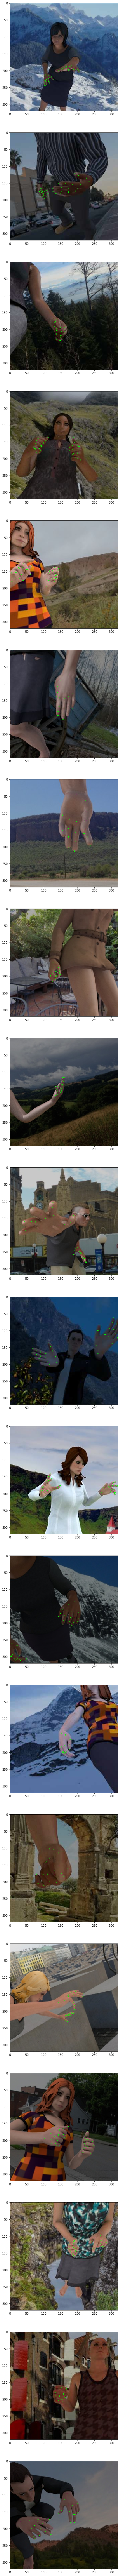

In [12]:
f, subs = plt.subplots(len(SAMPLES_TO_CHECK), 1, figsize=(15, 8*len(SAMPLES_TO_CHECK)))
for c, im in enumerate(images_show):
    subs[c].imshow(im)
    #subs[c].set_title(f"Confidence: {np.max(res[c][:,:,:,0])}")